In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (15,5)

In [3]:
sns.set_style('darkgrid')

In [4]:
corona = pd.read_csv(r'covid_19_data.csv')

In [5]:
corona.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [18]:
top_countries = corona.groupby(['Country/Region']).max().sort_values('Deaths',ascending = False).reset_index().head(10)['Country/Region']

In [6]:
line_df = pd.read_csv(r'C:\Users\ssiva\Documents\Machine Learning\novel-corona-virus-2019-dataset\COVID19_line_list_data.csv')

In [7]:
line_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 27 columns):
id                       1085 non-null int64
case_in_country          888 non-null float64
reporting date           1084 non-null object
Unnamed: 3               0 non-null float64
summary                  1080 non-null object
location                 1085 non-null object
country                  1085 non-null object
gender                   902 non-null object
age                      843 non-null float64
symptom_onset            563 non-null object
If_onset_approximated    560 non-null float64
hosp_visit_date          507 non-null object
exposure_start           128 non-null object
exposure_end             341 non-null object
visiting Wuhan           1085 non-null int64
from Wuhan               1081 non-null float64
death                    1085 non-null object
recovered                1085 non-null object
symptom                  270 non-null object
source                   108

In [8]:
line_df.describe()

,id,case_in_country,Unnamed: 3,age,If_onset_approximated,visiting Wuhan,from Wuhan,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
count,1085.000000,888.000000,0.0,843.000000,560.000000,1085.000000,1081.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,543.000000,48.841216,NaN,49.483689,0.042857,0.176959,0.144311,NaN,NaN,NaN,NaN,NaN,NaN
std,313.356825,78.853528,NaN,18.255334,0.202716,0.381810,0.351567,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,0.250000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,272.000000,11.000000,NaN,35.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,543.000000,28.000000,NaN,51.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,814.000000,67.250000,NaN,64.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,1085.000000,1443.000000,NaN,96.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
line_df.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
line_df.isna().sum()

id                          0
case_in_country           197
reporting date              1
Unnamed: 3               1085
summary                     5
location                    0
country                     0
gender                    183
age                       242
symptom_onset             522
If_onset_approximated     525
hosp_visit_date           578
exposure_start            957
exposure_end              744
visiting Wuhan              0
from Wuhan                  4
death                       0
recovered                   0
symptom                   815
source                      0
link                        0
Unnamed: 21              1085
Unnamed: 22              1085
Unnamed: 23              1085
Unnamed: 24              1085
Unnamed: 25              1085
Unnamed: 26              1085
dtype: int64

In [11]:
line_df.dropna(axis = 1,thresh = 200,inplace = True)

In [12]:
line_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 19 columns):
id                       1085 non-null int64
case_in_country          888 non-null float64
reporting date           1084 non-null object
summary                  1080 non-null object
location                 1085 non-null object
country                  1085 non-null object
gender                   902 non-null object
age                      843 non-null float64
symptom_onset            563 non-null object
If_onset_approximated    560 non-null float64
hosp_visit_date          507 non-null object
exposure_end             341 non-null object
visiting Wuhan           1085 non-null int64
from Wuhan               1081 non-null float64
death                    1085 non-null object
recovered                1085 non-null object
symptom                  270 non-null object
source                   1085 non-null object
link                     1085 non-null object
dtypes: float64(4), int64

In [13]:
line_df.describe()

,id,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
count,1085.000000,888.000000,843.000000,560.000000,1085.000000,1081.000000
mean,543.000000,48.841216,49.483689,0.042857,0.176959,0.144311
std,313.356825,78.853528,18.255334,0.202716,0.381810,0.351567
min,1.000000,1.000000,0.250000,0.000000,0.000000,0.000000
25%,272.000000,11.000000,35.000000,0.000000,0.000000,0.000000
50%,543.000000,28.000000,51.000000,0.000000,0.000000,0.000000
75%,814.000000,67.250000,64.000000,0.000000,0.000000,0.000000
max,1085.000000,1443.000000,96.000000,1.000000,1.000000,1.000000


In [14]:
line_df.head()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [15]:
line_df['country'] = line_df['country'].apply(lambda country: 'Mainland China' if country == 'China' else country)
line_df['country'] = line_df['country'].apply(lambda country: 'US' if country == 'USA' else country)

In [16]:
line_df.head()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",Mainland China,male,66.0,01/03/20,0.0,01/11/20,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,Mainland China,female,56.0,1/15/2020,0.0,1/15/2020,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,Mainland China,male,46.0,01/04/20,0.0,1/17/2020,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,Mainland China,female,60.0,NaN,NaN,1/19/2020,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,Mainland China,male,58.0,NaN,NaN,1/14/2020,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [19]:
line_df[line_df['country'].isin(top_countries)]['country'].value_counts()

Mainland China    197
Germany            54
France             39
Spain              34
UK                 20
Iran               18
US                 18
Italy               3
Belgium             1
Name: country, dtype: int64

In [21]:
top_countries = corona.groupby(['Country/Region']).max().sort_values('Deaths',ascending = False).reset_index().head(10)['Country/Region']

In [36]:
top_line_df = line_df[line_df['country'].isin(top_countries)].groupby('country').mean().reset_index()

In [53]:
top_line_df

,country,id,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
0,Belgium,1032.0,1.0,NaN,NaN,1.000000,0.000000
1,France,217.0,20.0,46.611111,0.200000,0.051282,0.076923
2,Germany,822.5,27.5,40.214286,0.000000,0.037037,0.000000
3,Iran,1042.5,9.5,NaN,NaN,0.000000,0.000000
4,Italy,966.0,2.0,35.000000,NaN,1.000000,0.000000
5,Mainland China,99.0,NaN,49.000000,0.000000,0.431472,0.424870
6,Spain,1013.5,17.5,43.809524,NaN,0.000000,0.000000
7,UK,979.5,10.5,53.000000,NaN,0.100000,0.000000
8,US,741.5,9.5,50.000000,0.428571,0.611111,0.055556


In [54]:
neth = pd.DataFrame(data = [['Netherlands',np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]],columns = top_line_df.columns)

In [56]:
top_line_df = top_line_df.append(neth)

In [60]:
top_line_df.reset_index(inplace= True)

In [62]:
top_line_df

,index,country,id,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
0,0,Belgium,1032.0,1.0,NaN,NaN,1.000000,0.000000
1,1,France,217.0,20.0,46.611111,0.200000,0.051282,0.076923
2,2,Germany,822.5,27.5,40.214286,0.000000,0.037037,0.000000
3,3,Iran,1042.5,9.5,NaN,NaN,0.000000,0.000000
4,4,Italy,966.0,2.0,35.000000,NaN,1.000000,0.000000
5,5,Mainland China,99.0,NaN,49.000000,0.000000,0.431472,0.424870
6,6,Spain,1013.5,17.5,43.809524,NaN,0.000000,0.000000
7,7,UK,979.5,10.5,53.000000,NaN,0.100000,0.000000
8,8,US,741.5,9.5,50.000000,0.428571,0.611111,0.055556
9,0,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
final_df

,Country/Region,ObservationDate,SNo,Confirmed,Deaths,Recovered
0,Belgium,04/01/2020,10687,13964.0,828.0,2132.0
1,France,04/01/2020,108981,57749.0,4043.0,11053.0
2,Germany,04/01/2020,10733,77872.0,920.0,18700.0
3,Iran,04/01/2020,10748,47593.0,3036.0,15473.0
4,Italy,04/01/2020,10752,110574.0,13155.0,16847.0
5,Mainland China,04/01/2020,338397,81555.0,3312.0,76248.0
6,Netherlands,04/01/2020,43469,13696.0,1175.0,260.0
7,Spain,04/01/2020,10822,104118.0,9387.0,22647.0
8,UK,04/01/2020,108802,29865.0,2357.0,179.0
9,US,04/01/2020,633278,213372.0,4757.0,8474.0


In [75]:
top_line_df.rename(mapper={'country':'Country/Region'},axis = 1,inplace = True)

In [69]:
top_line_df.drop('index',axis = 1,inplace = True)

In [76]:
top_line_df

,Country/Region,id,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
0,Belgium,1032.0,1.0,NaN,NaN,1.000000,0.000000
1,France,217.0,20.0,46.611111,0.200000,0.051282,0.076923
2,Germany,822.5,27.5,40.214286,0.000000,0.037037,0.000000
3,Iran,1042.5,9.5,NaN,NaN,0.000000,0.000000
4,Italy,966.0,2.0,35.000000,NaN,1.000000,0.000000
5,Mainland China,99.0,NaN,49.000000,0.000000,0.431472,0.424870
6,Spain,1013.5,17.5,43.809524,NaN,0.000000,0.000000
7,UK,979.5,10.5,53.000000,NaN,0.100000,0.000000
8,US,741.5,9.5,50.000000,0.428571,0.611111,0.055556
9,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
final_df_check = final_df.merge(right = top_line_df,how = 'left',left_on= final_df['Country/Region'],right_on = top_line_df['Country/Region'])

In [78]:
final_df_check

,key_0,Country/Region_x,ObservationDate,SNo,Confirmed,Deaths,Recovered,Country/Region_y,id,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
0,Belgium,Belgium,04/01/2020,10687,13964.0,828.0,2132.0,Belgium,1032.0,1.0,NaN,NaN,1.000000,0.000000
1,France,France,04/01/2020,108981,57749.0,4043.0,11053.0,France,217.0,20.0,46.611111,0.200000,0.051282,0.076923
2,Germany,Germany,04/01/2020,10733,77872.0,920.0,18700.0,Germany,822.5,27.5,40.214286,0.000000,0.037037,0.000000
3,Iran,Iran,04/01/2020,10748,47593.0,3036.0,15473.0,Iran,1042.5,9.5,NaN,NaN,0.000000,0.000000
4,Italy,Italy,04/01/2020,10752,110574.0,13155.0,16847.0,Italy,966.0,2.0,35.000000,NaN,1.000000,0.000000
5,Mainland China,Mainland China,04/01/2020,338397,81555.0,3312.0,76248.0,Mainland China,99.0,NaN,49.000000,0.000000,0.431472,0.424870
6,Netherlands,Netherlands,04/01/2020,43469,13696.0,1175.0,260.0,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN
7,Spain,Spain,04/01/2020,10822,104118.0,9387.0,22647.0,Spain,1013.5,17.5,43.809524,NaN,0.000000,0.000000
8,UK,UK,04/01/2020,108802,29865.0,2357.0,179.0,UK,979.5,10.5,53.000000,NaN,0.100000,0.000000
9,US,US,04/01/2020,633278,213372.0,4757.0,8474.0,US,741.5,9.5,50.000000,0.428571,0.611111,0.055556


In [129]:
final_df_check.drop(['key_0','Country/Region_y'],axis = 1,inplace = True)

In [80]:
countries = pd.read_csv(r'C:\Users\ssiva\Downloads\countries-of-the-world\countries of the world.csv')

In [97]:
countries['Country'] = countries['Country'].apply(lambda string:string[0:len(string)-1])

In [102]:
countries[countries['Country'].isin(top_countries)]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
19,Belgium,WESTERN EUROPE,10379067,30528,"340,0","0,22","1,23","4,68",29100.0,"98,0","462,6","23,28","0,4","76,32",3,"10,38","10,27","0,01","0,24","0,749"
69,France,WESTERN EUROPE,60876136,547030,"111,3","0,63","0,66","4,26",27600.0,"99,0","586,4","33,53","2,07","64,4",4,"11,99","9,14","0,022","0,214","0,764"
76,Germany,WESTERN EUROPE,82422299,357021,"230,9","0,67","2,18","4,16",27600.0,"99,0","667,9","33,85","0,59","65,56",3,"8,25","10,62","0,009","0,296","0,695"
96,Iran,ASIA (EX. NEAR EAST),68688433,1648000,"41,7","0,15","-0,84","41,58",7000.0,"79,4","276,4","8,72","1,39","89,89",1,17,"5,55","0,116","0,424","0,46"
101,Italy,WESTERN EUROPE,58133509,301230,"193,0","2,52","2,07","5,94",26700.0,"98,6","430,9","27,79","9,53","62,68",NaN,"8,72","10,4","0,021","0,291","0,688"
146,Netherlands,WESTERN EUROPE,16491461,41526,"397,1","1,09","2,91","5,04",28600.0,"99,0","460,8","26,71","0,97","72,32",3,"10,9","8,68","0,021","0,244","0,736"
190,Spain,WESTERN EUROPE,40397842,504782,"80,0","0,98","0,99","4,42",22000.0,"97,9","453,5","26,07","9,87","64,06",3,"10,06","9,72","0,04","0,295","0,665"
214,US,NORTHERN AMERICA,298444215,9631420,"31,0","0,21","3,41","6,5",37800.0,"97,0","898,0","19,13","0,22","80,65",3,"14,14","8,26","0,01","0,204","0,787"


In [98]:
countries[countries['Country'] == 'United States']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
214,United States,NORTHERN AMERICA,298444215,9631420,"31,0","0,21","3,41","6,5",37800.0,"97,0","898,0","19,13","0,22","80,65",3,"14,14","8,26","0,01","0,204","0,787"


In [99]:
countries['Country'] = countries['Country'].apply(lambda country:'US' if country == 'United States' else country)

In [118]:
top_c = list(countries[countries['Country'].isin(top_countries)]['Country'].value_counts().index)
replace_names = []
for country in top_countries:
    if country not in top_c:
        replace_names.append(country)
replace_names

[]

In [115]:
countries['Country'] = countries['Country'].apply(lambda country:'US' if country == 'USA' else country)

In [116]:
countries['Country'] = countries['Country'].apply(lambda country:'Mainland China' if country == 'China' else country)

In [117]:
countries['Country'] = countries['Country'].apply(lambda country:'UK' if country == 'United Kingdom' else country)

In [121]:
countries_top_corona = countries[countries['Country'].isin(top_countries)]

In [130]:
df = final_df_check.merge(right = countries_top_corona,how= 'left', left_on = final_df_check['Country/Region_x'], right_on = countries_top_corona['Country'])

In [131]:
df

,key_0,Country/Region_x,ObservationDate,SNo,Confirmed,Deaths,Recovered,id,case_in_country,age,...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Belgium,Belgium,04/01/2020,10687,13964.0,828.0,2132.0,1032.0,1.0,NaN,...,"462,6","23,28","0,4","76,32",3,"10,38","10,27","0,01","0,24","0,749"
1,France,France,04/01/2020,108981,57749.0,4043.0,11053.0,217.0,20.0,46.611111,...,"586,4","33,53","2,07","64,4",4,"11,99","9,14","0,022","0,214","0,764"
2,Germany,Germany,04/01/2020,10733,77872.0,920.0,18700.0,822.5,27.5,40.214286,...,"667,9","33,85","0,59","65,56",3,"8,25","10,62","0,009","0,296","0,695"
3,Iran,Iran,04/01/2020,10748,47593.0,3036.0,15473.0,1042.5,9.5,NaN,...,"276,4","8,72","1,39","89,89",1,17,"5,55","0,116","0,424","0,46"
4,Italy,Italy,04/01/2020,10752,110574.0,13155.0,16847.0,966.0,2.0,35.000000,...,"430,9","27,79","9,53","62,68",NaN,"8,72","10,4","0,021","0,291","0,688"
5,Mainland China,Mainland China,04/01/2020,338397,81555.0,3312.0,76248.0,99.0,NaN,49.000000,...,"266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"
6,Netherlands,Netherlands,04/01/2020,43469,13696.0,1175.0,260.0,NaN,NaN,NaN,...,"460,8","26,71","0,97","72,32",3,"10,9","8,68","0,021","0,244","0,736"
7,Spain,Spain,04/01/2020,10822,104118.0,9387.0,22647.0,1013.5,17.5,43.809524,...,"453,5","26,07","9,87","64,06",3,"10,06","9,72","0,04","0,295","0,665"
8,UK,UK,04/01/2020,108802,29865.0,2357.0,179.0,979.5,10.5,53.000000,...,"543,5","23,46","0,21","76,33",3,"10,71","10,13","0,005","0,237","0,758"
9,US,US,04/01/2020,633278,213372.0,4757.0,8474.0,741.5,9.5,50.000000,...,"898,0","19,13","0,22","80,65",3,"14,14","8,26","0,01","0,204","0,787"


([<matplotlib.patches.Wedge at 0x2800084a390>,
 [Text(1.09812,0.0642742,'Belgium'),
  Text(1.02998,0.386175,'France'),
  Text(0.660674,0.879494,'Germany'),
  Text(0.130561,1.09222,'Iran'),
  Text(-0.568604,0.941642,'Italy'),
  Text(-1.07273,0.243435,'Mainland China'),
  Text(-1.08308,-0.192217,'Netherlands'),
  Text(-0.86295,-0.682142,'Spain'),
  Text(-0.367801,-1.03669,'UK'),
  Text(0.689491,-0.857089,'US')])

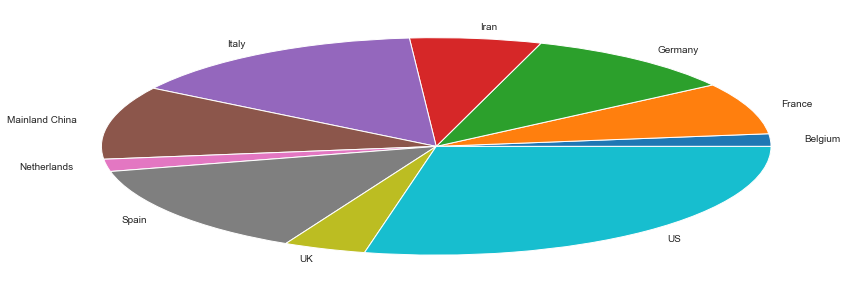

In [32]:
plt.pie(data=groupeddf.groupby('Country/Region').max().reset_index(),x = 'Confirmed',labels = 'Country/Region')

([<matplotlib.patches.Wedge at 0x1a7361590f0>,
 [Text(1.09799,0.0665491,'Belgium'),
  Text(1.00589,0.445181,'France'),
  Text(0.782382,0.773226,'Germany'),
  Text(0.529351,0.964255,'Iran'),
  Text(-0.693117,0.85416,'Italy'),
  Text(-1.04594,-0.340607,'Mainland China'),
  Text(-0.880418,-0.659442,'Netherlands'),
  Text(-0.170608,-1.08669,'Spain'),
  Text(0.71107,-0.839273,'UK'),
  Text(1.03414,-0.374904,'US')])

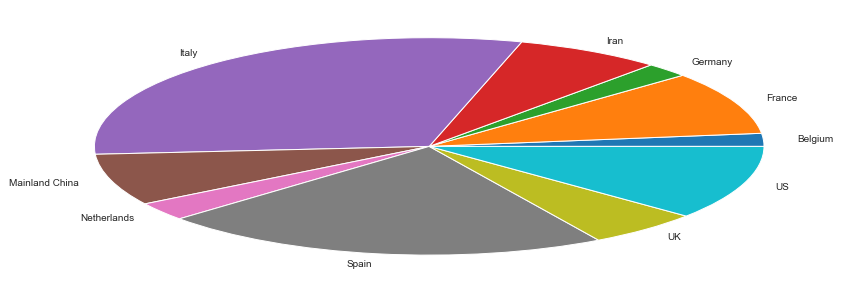

In [189]:
plt.pie(data=groupeddf.groupby('Country/Region').max().reset_index(),x = 'Deaths',labels = 'Country/Region')

([<matplotlib.patches.Wedge at 0x1a7361b27b8>,
 [Text(1.09917,0.0428212,'Belgium'),
  Text(1.05724,0.303722,'France'),
  Text(0.747911,0.806616,'Germany'),
  Text(0.135534,1.09162,'Iran'),
  Text(-0.494991,0.982336,'Italy'),
  Text(-0.910212,-0.617669,'Mainland China'),
  Text(0.451288,-1.00316,'Netherlands'),
  Text(0.81992,-0.733302,'Spain'),
  Text(1.04662,-0.338499,'UK'),
  Text(1.08685,-0.169564,'US')])

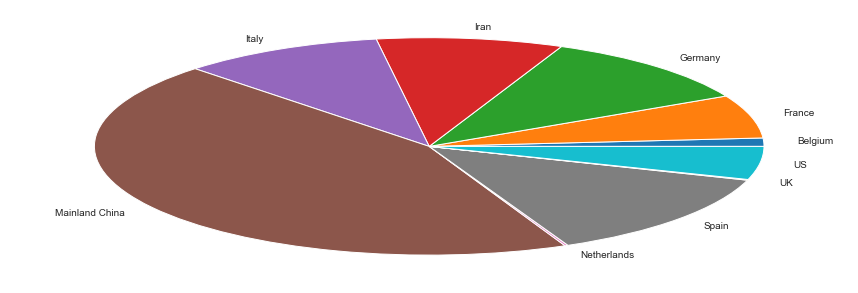

In [190]:
plt.pie(data=groupeddf.groupby('Country/Region').max().reset_index(),x = 'Recovered',labels = 'Country/Region')

In [44]:
top_countries = corona.groupby(['Country/Region']).max().sort_values('Deaths',ascending = False).reset_index().head(10)['Country/Region']

In [24]:
top_countries = list(top_countries)
top_corona = corona[corona['Country/Region'].isin(top_countries)]
top_corona.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [235]:
top_c = list(line_df[line_df['country'].isin(top_countries)]['country'].value_counts().index)
replace_names = []
for country in top_countries:
    if country not in top_c:
        replace_names.append(country)
replace_names

['US', 'Netherlands']

In [160]:
top_corona.groupby(['ObservationDate','Country/Region']).sum().head()

SNo  Confirmed  Deaths  Recovered
ObservationDate Country/Region                                    
01/22/2020      Mainland China   535      547.0    17.0       28.0
                US                32        1.0     0.0        0.0
01/23/2020      Mainland China  1713      639.0    18.0       30.0
                US                70        1.0     0.0        0.0
01/24/2020      France           125        2.0     0.0        0.0

In [25]:
groupeddf = top_corona.groupby(['ObservationDate','Country/Region']).sum().reset_index()
groupeddf.head(10)

,ObservationDate,Country/Region,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Mainland China,535,547.0,17.0,28.0
1,01/22/2020,US,32,1.0,0.0,0.0
2,01/23/2020,Mainland China,1713,639.0,18.0,30.0
3,01/23/2020,US,70,1.0,0.0,0.0
4,01/24/2020,France,125,2.0,0.0,0.0
5,01/24/2020,Mainland China,3004,916.0,26.0,36.0
6,01/24/2020,US,237,2.0,0.0,0.0
7,01/25/2020,France,166,3.0,0.0,0.0
8,01/25/2020,Mainland China,4224,1399.0,42.0,39.0
9,01/25/2020,US,319,2.0,0.0,0.0


In [39]:
final_df = groupeddf.groupby('Country/Region').max().reset_index()

In [31]:
final_df

,Country/Region,ObservationDate,SNo,Confirmed,Deaths,Recovered
0,Belgium,04/01/2020,10687,13964.0,828.0,2132.0
1,France,04/01/2020,108981,57749.0,4043.0,11053.0
2,Germany,04/01/2020,10733,77872.0,920.0,18700.0
3,Iran,04/01/2020,10748,47593.0,3036.0,15473.0
4,Italy,04/01/2020,10752,110574.0,13155.0,16847.0
5,Mainland China,04/01/2020,338397,81555.0,3312.0,76248.0
6,Netherlands,04/01/2020,43469,13696.0,1175.0,260.0
7,Spain,04/01/2020,10822,104118.0,9387.0,22647.0
8,UK,04/01/2020,108802,29865.0,2357.0,179.0
9,US,04/01/2020,633278,213372.0,4757.0,8474.0


In [26]:
groupeddf['Country/Region'].value_counts()

US                71
Mainland China    71
France            69
Germany           65
Italy             62
UK                62
Spain             61
Belgium           58
Iran              43
Netherlands       35
Name: Country/Region, dtype: int64

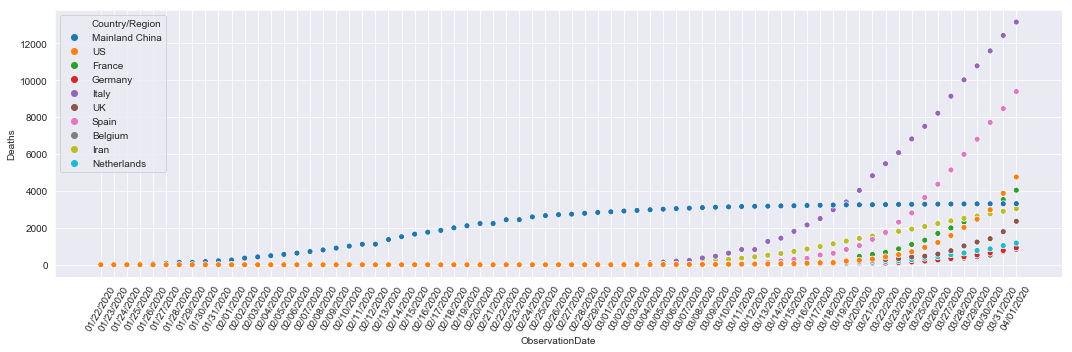

In [27]:
sns.scatterplot(x = 'ObservationDate', y = 'Deaths',data= groupeddf,hue='Country/Region')
plt.xticks(rotation = 60)
plt.tight_layout()

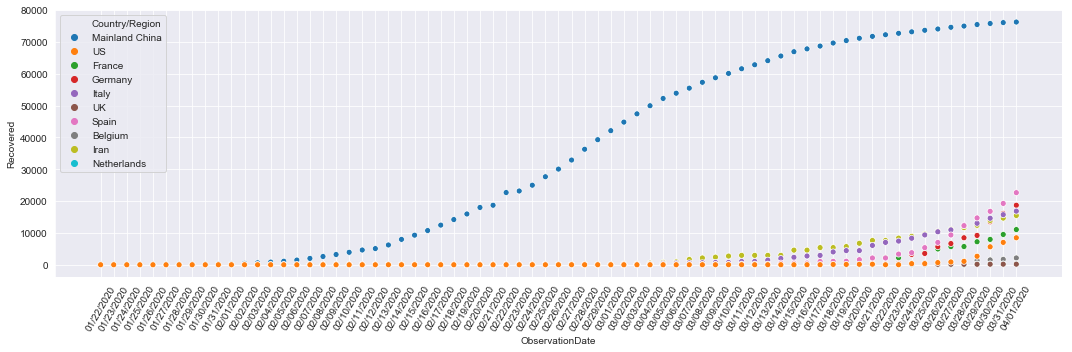

In [28]:
sns.scatterplot(x = 'ObservationDate', y = 'Recovered',data= groupeddf,hue = 'Country/Region')
plt.xticks(rotation = 60)
plt.tight_layout()

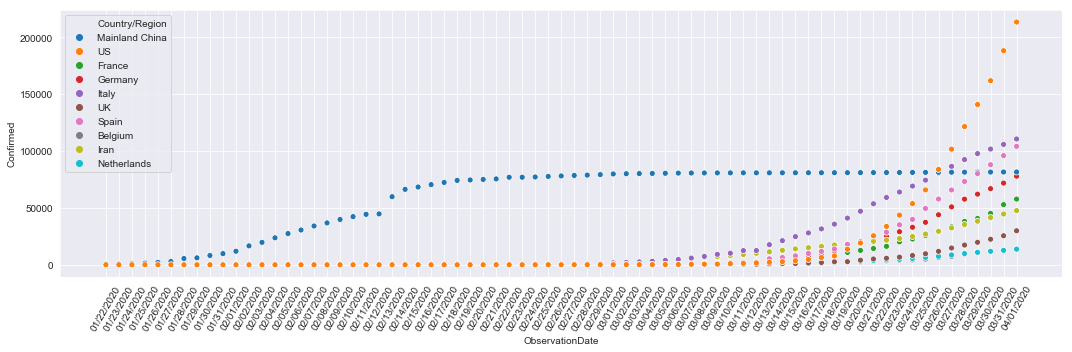

In [63]:
sns.scatterplot(x = 'ObservationDate', y = 'Confirmed',data= groupeddf,hue='Country/Region')
plt.xticks(rotation = 60)
plt.tight_layout()

In [155]:
groupeddf.groupby(['Country/Region']).max().reset_index()

,Country/Region,ObservationDate,SNo,Confirmed,Deaths,Recovered
0,Belgium,04/01/2020,10687,13964.0,828.0,2132.0
1,France,04/01/2020,108981,57749.0,4043.0,11053.0
2,Germany,04/01/2020,10733,77872.0,920.0,18700.0
3,Iran,04/01/2020,10748,47593.0,3036.0,15473.0
4,Italy,04/01/2020,10752,110574.0,13155.0,16847.0
5,Mainland China,04/01/2020,338397,81555.0,3312.0,76248.0
6,Netherlands,04/01/2020,43469,13696.0,1175.0,260.0
7,Spain,04/01/2020,10822,104118.0,9387.0,22647.0
8,UK,04/01/2020,108802,29865.0,2357.0,179.0
9,US,04/01/2020,633278,213372.0,4757.0,8474.0


Text(0,0.5,'Occurrences')

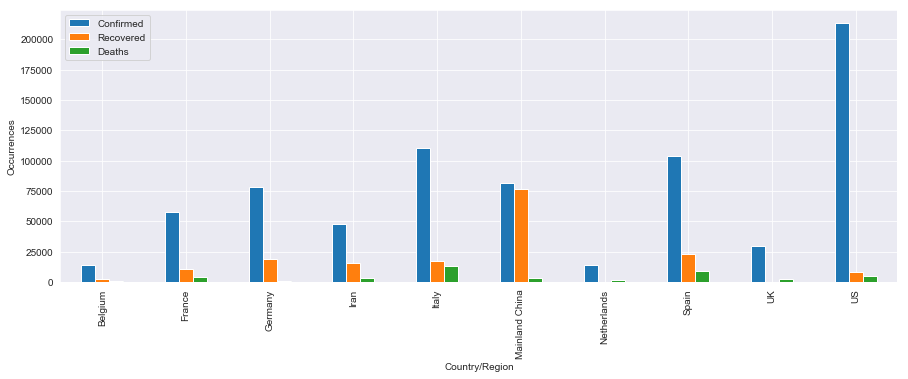

In [166]:
groupeddf.groupby(['Country/Region']).max().reset_index().plot.bar(x = 'Country/Region',y = ['Confirmed','Recovered','Deaths'])
plt.ylabel('Occurrences')

In [99]:
corona[corona['Country/Region'] == 'India'].max()

SNo                      10746
ObservationDate     04/01/2020
Province/State            None
Country/Region           India
Last Update        3/8/20 5:31
Confirmed                 1998
Deaths                      58
Recovered                  148
dtype: object

In [132]:
# Working with full dataset 

In [133]:
df

,key_0,Country/Region_x,ObservationDate,SNo,Confirmed,Deaths,Recovered,id,case_in_country,age,...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Belgium,Belgium,04/01/2020,10687,13964.0,828.0,2132.0,1032.0,1.0,NaN,...,"462,6","23,28","0,4","76,32",3,"10,38","10,27","0,01","0,24","0,749"
1,France,France,04/01/2020,108981,57749.0,4043.0,11053.0,217.0,20.0,46.611111,...,"586,4","33,53","2,07","64,4",4,"11,99","9,14","0,022","0,214","0,764"
2,Germany,Germany,04/01/2020,10733,77872.0,920.0,18700.0,822.5,27.5,40.214286,...,"667,9","33,85","0,59","65,56",3,"8,25","10,62","0,009","0,296","0,695"
3,Iran,Iran,04/01/2020,10748,47593.0,3036.0,15473.0,1042.5,9.5,NaN,...,"276,4","8,72","1,39","89,89",1,17,"5,55","0,116","0,424","0,46"
4,Italy,Italy,04/01/2020,10752,110574.0,13155.0,16847.0,966.0,2.0,35.000000,...,"430,9","27,79","9,53","62,68",NaN,"8,72","10,4","0,021","0,291","0,688"
5,Mainland China,Mainland China,04/01/2020,338397,81555.0,3312.0,76248.0,99.0,NaN,49.000000,...,"266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"
6,Netherlands,Netherlands,04/01/2020,43469,13696.0,1175.0,260.0,NaN,NaN,NaN,...,"460,8","26,71","0,97","72,32",3,"10,9","8,68","0,021","0,244","0,736"
7,Spain,Spain,04/01/2020,10822,104118.0,9387.0,22647.0,1013.5,17.5,43.809524,...,"453,5","26,07","9,87","64,06",3,"10,06","9,72","0,04","0,295","0,665"
8,UK,UK,04/01/2020,108802,29865.0,2357.0,179.0,979.5,10.5,53.000000,...,"543,5","23,46","0,21","76,33",3,"10,71","10,13","0,005","0,237","0,758"
9,US,US,04/01/2020,633278,213372.0,4757.0,8474.0,741.5,9.5,50.000000,...,"898,0","19,13","0,22","80,65",3,"14,14","8,26","0,01","0,204","0,787"


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 33 columns):
key_0                                 10 non-null object
Country/Region_x                      10 non-null object
ObservationDate                       10 non-null object
SNo                                   10 non-null int64
Confirmed                             10 non-null float64
Deaths                                10 non-null float64
Recovered                             10 non-null float64
id                                    9 non-null float64
case_in_country                       8 non-null float64
age                                   7 non-null float64
If_onset_approximated                 4 non-null float64
visiting Wuhan                        9 non-null float64
from Wuhan                            9 non-null float64
Country                               10 non-null object
Region                                10 non-null object
Population                            10 

In [135]:
df.describe()

,SNo,Confirmed,Deaths,Recovered,id,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan,Population,Area (sq. mi.),GDP ($ per capita)
count,10.000000,10.000000,10.000000,10.000000,9.000000,8.000000,7.000000,4.000000,9.000000,9.000000,1.000000e+01,1.000000e+01,10.000000
mean,128666.900000,75035.800000,4297.000000,17201.300000,768.166667,12.187500,45.376417,0.157143,0.358989,0.061928,2.010416e+08,2.290332e+06,23910.000000
std,204446.075697,59517.377447,4002.184126,22209.468912,361.262889,9.023531,6.203818,0.204041,0.420382,0.139196,3.994024e+08,3.886736e+06,10211.262845
min,10687.000000,13696.000000,828.000000,179.000000,99.000000,1.000000,35.000000,0.000000,0.000000,0.000000,1.037907e+07,3.052800e+04,5000.000000
25%,10749.000000,34297.000000,1470.500000,3717.500000,741.500000,7.625000,42.011905,0.000000,0.037037,0.000000,4.483176e+07,2.589225e+05,23175.000000
50%,27145.500000,67810.500000,3174.000000,13263.000000,966.000000,10.000000,46.611111,0.100000,0.100000,0.000000,6.074264e+07,4.309015e+05,27600.000000
75%,108936.250000,98477.250000,4578.500000,18236.750000,1013.500000,18.125000,49.500000,0.257143,0.611111,0.055556,7.898883e+07,1.372758e+06,28375.000000
max,633278.000000,213372.000000,13155.000000,76248.000000,1042.500000,27.500000,53.000000,0.428571,1.000000,0.424870,1.313974e+09,9.631420e+06,37800.000000


In [197]:
df1 = df.groupby('Country/Region_x').mean()

In [198]:
df1['Pop_Density'] = df1[['Population','Area (sq. mi.)']].apply(lambda l: l[0] / l[1],axis = 1)

In [199]:
df1

,SNo,Confirmed,Deaths,Recovered,id,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan,Population,Area (sq. mi.),GDP ($ per capita),Pop_Density
Country/Region_x,,,,,,,,,,,,,,
Belgium,10687,13964.0,828.0,2132.0,1032.0,1.0,NaN,NaN,1.000000,0.000000,10379067,30528,29100.0,339.985161
France,108981,57749.0,4043.0,11053.0,217.0,20.0,46.611111,0.200000,0.051282,0.076923,60876136,547030,27600.0,111.284822
Germany,10733,77872.0,920.0,18700.0,822.5,27.5,40.214286,0.000000,0.037037,0.000000,82422299,357021,27600.0,230.861207
Iran,10748,47593.0,3036.0,15473.0,1042.5,9.5,NaN,NaN,0.000000,0.000000,68688433,1648000,7000.0,41.679874
Italy,10752,110574.0,13155.0,16847.0,966.0,2.0,35.000000,NaN,1.000000,0.000000,58133509,301230,26700.0,192.987116
Mainland China,338397,81555.0,3312.0,76248.0,99.0,NaN,49.000000,0.000000,0.431472,0.424870,1313973713,9596960,5000.0,136.915618
Netherlands,43469,13696.0,1175.0,260.0,NaN,NaN,NaN,NaN,NaN,NaN,16491461,41526,28600.0,397.135794
Spain,10822,104118.0,9387.0,22647.0,1013.5,17.5,43.809524,NaN,0.000000,0.000000,40397842,504782,22000.0,80.030274
UK,108802,29865.0,2357.0,179.0,979.5,10.5,53.000000,NaN,0.100000,0.000000,60609153,244820,27700.0,247.566183


In [200]:
df1.rename(mapper = {'Area (sq. mi.)':'Area (sq. km.)'},axis = 1,inplace = True)

In [201]:
df1

,SNo,Confirmed,Deaths,Recovered,id,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan,Population,Area (sq. km.),GDP ($ per capita),Pop_Density
Country/Region_x,,,,,,,,,,,,,,
Belgium,10687,13964.0,828.0,2132.0,1032.0,1.0,NaN,NaN,1.000000,0.000000,10379067,30528,29100.0,339.985161
France,108981,57749.0,4043.0,11053.0,217.0,20.0,46.611111,0.200000,0.051282,0.076923,60876136,547030,27600.0,111.284822
Germany,10733,77872.0,920.0,18700.0,822.5,27.5,40.214286,0.000000,0.037037,0.000000,82422299,357021,27600.0,230.861207
Iran,10748,47593.0,3036.0,15473.0,1042.5,9.5,NaN,NaN,0.000000,0.000000,68688433,1648000,7000.0,41.679874
Italy,10752,110574.0,13155.0,16847.0,966.0,2.0,35.000000,NaN,1.000000,0.000000,58133509,301230,26700.0,192.987116
Mainland China,338397,81555.0,3312.0,76248.0,99.0,NaN,49.000000,0.000000,0.431472,0.424870,1313973713,9596960,5000.0,136.915618
Netherlands,43469,13696.0,1175.0,260.0,NaN,NaN,NaN,NaN,NaN,NaN,16491461,41526,28600.0,397.135794
Spain,10822,104118.0,9387.0,22647.0,1013.5,17.5,43.809524,NaN,0.000000,0.000000,40397842,504782,22000.0,80.030274
UK,108802,29865.0,2357.0,179.0,979.5,10.5,53.000000,NaN,0.100000,0.000000,60609153,244820,27700.0,247.566183


In [210]:
plt.rcParams['figure.figsize'] = (9,7)

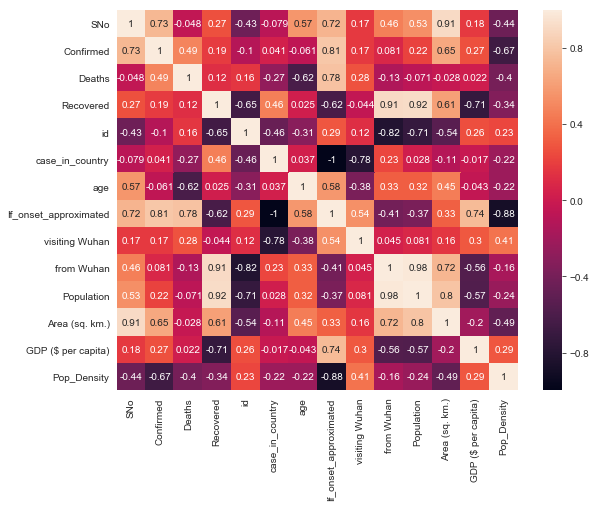

In [211]:
sns.heatmap(df1.corr(),annot = True)